# Step 1: Frame the problem and look at the big picture

tekst tekst tekst

# Step 2: Get the data

In [1]:
#importerer nødvendige biblioteker som skal brukes i løpet av koden
!pip install squarify
import os
import random
import json
import numpy as np
import pandas as pd
from scipy.stats import kurtosis, skew # it's to explore some statistics of numerical values
from pandas.io.json import json_normalize
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import json 
import squarify # to better understand proportion of categorys - it's a treemap layout algorithm
import pandas as pd 
from pandas.io.json import json_normalize
plt.style.use('fivethirtyeight')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def load_df(csv_path='/content/drive/My Drive/input/train.csv', nrows=None):
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']

    df = pd.read_csv(csv_path, dtype={'fullVisitorId': 'str'}, nrows=nrows)

    for column in JSON_COLUMNS:
        df = df.join(pd.DataFrame(df.pop(column).apply(pd.io.json.loads).values.tolist(), index=df.index))

    return df

In [4]:
%%time
train_df = load_df()
test_df = load_df("/content/drive/My Drive/input/test.csv")

CPU times: user 1min 29s, sys: 14.6 s, total: 1min 44s
Wall time: 2min 1s


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 50 columns):
channelGrouping              903653 non-null object
date                         903653 non-null int64
fullVisitorId                903653 non-null object
sessionId                    903653 non-null object
socialEngagementType         903653 non-null object
visitId                      903653 non-null int64
visitNumber                  903653 non-null int64
visitStartTime               903653 non-null int64
browser                      903653 non-null object
browserSize                  903653 non-null object
browserVersion               903653 non-null object
deviceCategory               903653 non-null object
flashVersion                 903653 non-null object
isMobile                     903653 non-null bool
language                     903653 non-null object
mobileDeviceBranding         903653 non-null object
mobileDeviceInfo             903653 non-null object
mobileDevic

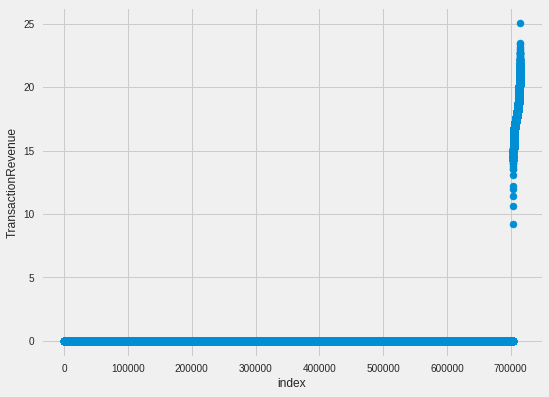

In [36]:
train_df["transactionRevenue"] = train_df["transactionRevenue"].astype('float')
gdf = train_df.groupby("fullVisitorId")["transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [37]:
nzi = pd.notnull(train_df["transactionRevenue"]).sum()
nzr = (gdf["transactionRevenue"]>0).sum()
print("Number of instances in train set with non-zero revenue : ", nzi, " and ratio is : ", nzi / train_df.shape[0])
print("Number of unique customers with non-zero revenue : ", nzr, "and the ratio is : ", nzr / gdf.shape[0])

Number of instances in train set with non-zero revenue :  11515  and ratio is :  0.0127427231470487
Number of unique customers with non-zero revenue :  9996 and the ratio is :  0.013996726255903731


In [10]:
print(train_df.head())


  channelGrouping      date        fullVisitorId  \
0  Organic Search  20160902  1131660440785968503   
1  Organic Search  20160902   377306020877927890   
2  Organic Search  20160902  3895546263509774583   
3  Organic Search  20160902  4763447161404445595   
4  Organic Search  20160902    27294437909732085   

                        sessionId  socialEngagementType     visitId  \
0  1131660440785968503_1472830385  Not Socially Engaged  1472830385   
1   377306020877927890_1472880147  Not Socially Engaged  1472880147   
2  3895546263509774583_1472865386  Not Socially Engaged  1472865386   
3  4763447161404445595_1472881213  Not Socially Engaged  1472881213   
4    27294437909732085_1472822600  Not Socially Engaged  1472822600   

   visitNumber  visitStartTime     browser                    browserSize  \
0            1      1472830385      Chrome  not available in demo dataset   
1            1      1472880147     Firefox  not available in demo dataset   
2            1      147286538

In [0]:
train = train_df

AttributeError: ignored